Data Mining: Basic Concepts - WS'21/22
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Prof. Dr. Daniel Keim, Eren Cakmak, Fabian Sperrle
```
__Organize in teams of 2 people, return the exercise by Thu, Dec 2nd, 2021 (11:59 PM) using ILIAS__

---

Assignment 03 in Python
---------------
- ___Please put your names and student IDs here___:
    - Viet Ha, 01/1143223
    - Zheng Zhou, 01/770880

---

#### Exercise 1: PCA 

We want to apply the principal component analysis (PCA) to the following ``numpy.array`` data. Continue with the following steps in order to calculate the PCA manually. Do not use any libraries for this task. You may however use any ``numpy`` and ``pandas`` method.

<AxesSubplot:>

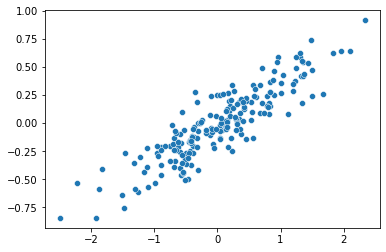

In [61]:
import numpy as np
import seaborn as sns
from sklearn import datasets

reg = np.random.RandomState(1)
arr = np.dot(reg.rand(2, 2), reg.randn(2, 200)).T
sns.scatterplot(x = arr[:,0], y = arr[:,1] )

##### __(a) Subtract the mean of the attributes__

In [62]:
x1, y1 = arr[:, 0] - arr[:, 0].mean(), arr[:, 1] - arr[:, 1].mean()
z = np.stack((x1, y1))

##### __(b) Compute the covariance matrix__ _(Hint: use ``numpy.cov()``)_

In [63]:
cov_mtx = np.cov(z)
cov_mtx

array([[0.68217761, 0.23093475],
       [0.23093475, 0.09883179]])

##### __(c) Determine the eigenvalues/eigenvectors of the matrix__ _(Hint: use ``numpy.linalg.eig()``)_

In [64]:
eig, eig_vec = np.linalg.eig(cov_mtx)
eig, eig_vec

(array([0.7625315, 0.0184779]),
 array([[ 0.94446029, -0.32862557],
        [ 0.32862557,  0.94446029]]))

##### __(d) Transform the data using the eigenvectors and plot the result.__

In [65]:
fea_vec_t = np.stack((eig_vec[:, 0], eig_vec[:, 1]))
fea_vec_t

array([[ 0.94446029,  0.32862557],
       [-0.32862557,  0.94446029]])

<AxesSubplot:>

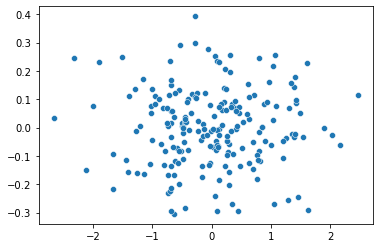

In [66]:
r = (fea_vec_t)@z
sns.scatterplot(x=r[0], y=r[1])

##### __(e) Name the percentage of the data variance that the first principle component already covers. (Calculate the ratio between the first eigenvalue and the sum of all eigenvalues)__

In [67]:
eig[0]/sum(eig)

0.9763410074208767

##### __(f) Imagine you have a dataset with 5 attributes. How many Eigenvalues would you get during step c?__

```
Eigenvalues are solutions of det(A-E*lambda), thus, when the dataset has 5 attributes, the dimension of matrix A is 5, which leads to 5 solutions (including imaginary solutions), or 5 eigenvalues.
```

---

#### Exercise 2: Linear Interpolation
Given the following dataset: 

In [62]:
import pandas as pd 

df = pd.DataFrame(np.array([[1, 3], [3, 8], [5, 12]]), columns=['time', 'temperature'])
print(df)

   time  temperature
0     1            3
1     3            8
2     5           12


##### __(a) Implement a method that takes any non-existing hour of the day (x) in the dataset (e.g., x = 4) between two existing values and gives the corresponding Temperature (y). Use linear interpolation for that (see formula below).__ 

$ y = y_1 + (y_2 - y_1) * \frac{x - x_1}{x_2 - x_1}$

_(Hint: x and y are the values you are looking for to fill any non-existing pair of time and corresponding temperature. The other elements in the formula you should get from the existing data.)_

In [68]:
def interpolation(x):
    y=0
    if x>1 and x<3:
        y = 3+(8-3)*(x-1)/(3-1)
    if x>3 and x<5:
        y = 8+(12-8)*(x-3)/(5-3)
    return y

##### __(b)  Use your method from (a) to interpolate and create new data points for ``x = 2`` and ``x = 4``. Visualize in a scatter plot the provided dataset and the two new data points you just created.__

In [81]:
d1 = interpolation(2)
d2 = interpolation(4)
df1 = df.append(pd.DataFrame(np.array([[2, d1], [4, d2]]), columns=['time', 'temperature']))
d1, d2, df1

,time,temperature
0,1.0,3.0
1,3.0,8.0
2,5.0,12.0
0,2.0,5.5
1,4.0,10.0


<AxesSubplot:xlabel='time', ylabel='temperature'>

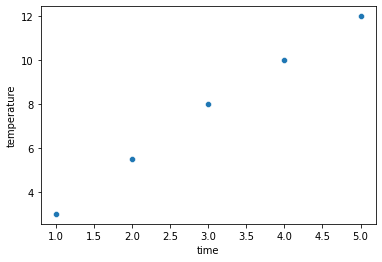

In [82]:
sns.scatterplot(x=df1['time'], y=df1['temperature'])

---

#### Exercise 3: Sampling Strategies

In [84]:
import numpy as np

y = np.random.choice([0,1],size=1000, p=[.2,.8])
y

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,

##### __(a) Given the data above, choose a sampling method that maximizes representativeness and implement it using only built-in libraries.__ _(Hint: The `random` library is handy for this task.)_

In [90]:
def systematic_random_sampling(x, n):
    samples = []
    k = 0
    y_sorted = np.sort(x)
    step = round(len(x)/n)
    while k < len(x):
        samples.append(int(y_sorted[k]))
        k += step
    return samples

##### __(b) Apply your sampling method and select `10` elements from the array `y`.__ 

In [91]:
systematic_random_sampling(y, 10)

[0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

---

#### Exercise 4: Decision Tree 
You need to decide whether an incoming E-Mail is spam or not. The following attributes are stored for each E-Mail: TimeZone, GeoLocation, SuspiciousSubject, SuspiciousBody.

|MsgID|TimeZone|GeoLocation|SuspiciousSubject|SuspiciousBody|Spam|
|-----|--------|-----------|-----------------|--------------|----|
|1|US|US|No|Yes|NoSpam|
|2|US|US|No|No|NoSpam|
|3|EU|US|No|Yes|Spam|
|4|AS|EU|No|Yes|Spam|
|5|AS|AS|Yes|Yes|Spam|
|6|AS|AS|Yes|No|NoSpam|
|7|EU|AS|Yes|No|Spam|
|8|US|EU|No|Yes|NoSpam|
|9|US|AS|Yes|Yes|Spam|
|10|AS|EU|Yes|Yes|Spam|
|11|US|EU|Yes|No|Spam|
|12|EU|EU|No|No|Spam|
|13|EU|US|Yes|Yes|Spam|
|14|AS|EU|No|No|NoSpam|

##### __Construct a decision tree based on the data of Table 2 by hand. Use the Information Gain as impurity measure. Multiple splits are allowed. If all records in one leave share the same class label, your tree has to terminate.__
__Comment on the steps you performed to create the decision tree. Show the results of your calculations and draw plot the final decision tree using.__ 

_(Hint: you can use the ``![](imagename.png)`` to include a image in a markdown cell. Use this to include the created or handdrawn plot of the decision tree. Do not forget to also upload the image in your final submission.)_

```
2 classes, m=2
14 data tuples, 9 spam (S), 5 NoSpam (NS)
4 attributes: (TimeZone, GeoLocation, SuspiciousSubject, SubspiciousBody) = (TZ, GL, SS, SB)

Step 1: Compute the expected information needed to classify a tuple in D
        Info(D) = -5/14*log2(5/14)-9/14*log2(9/14) = 0.9403
Step 2: Compute the expected information requirement for each attribute
        Info_TZ(D) = 5/14*(-3/5*log2(3/5)-2/5*log2(2/5)) + 4/14*(0-4/4*log2(4/4)) +
                     5/14*(-3/5*log2(3/5)-2/5*log2(2/5)) = 0.6935
        Info_GL(D) = 4/14*(-2/4*log2(2/4)-2/4*log2(2/4)) + 6/14*(-4/6*log2(4/6)-2/6*log2(2/6)) + 
                     4/14*(-3/4*log2(3/4)-1/4*log2(1/4)) = 0.9111
        Info_SS(D) = 7/14*(-4/7*log2(4/7)-3/7*log2(3/7)) + 7/14*(-6/7*log2(6/7)-1/7*log2(1/7)) = 0.7885
        Info_SB(D) = 8/14*(-2/8*log2(2/8)-6/8*log2(6/8)) + 6/14*(-3/6*log2(3/6)-3/6*log2(3/6)) = 0.8922
Step 3: The gain in information from such a patritioning
        Gain(TZ) = 0.9403-0.6935 = 0.2467 --> highest gain, split
        Gain(GL) = 0.9403-0.9111 = 0.0481
        Gain(SS) = 0.9403-0.7885 = 0.1518
        Gain(SB) = 0.9403-0.8922 = 0.0481

Consider tuples with TimeZone=US, every (Yes, No) in SuspiciousSbuject corresponds to class (Spam, NoSpam) respectively.
Consider tuples with TimeZone=EU, every tuple has the label Spam.
Consider tuples with TimeZone=AS, every (Yes, No) in SuspiciousBody corresponds to class (Spam, NoSpam) respectively.

Final decision tree below:
```

![](data_mining_dt.png)

![](data-mining-dt.png)

In [16]:
import math as m
info_d = -5/14*m.log2(5/14)-9/14*m.log2(9/14)
info_tz = 5/14*(-3/5*m.log2(3/5)-2/5*m.log2(2/5)) + 5/14*(-3/5*m.log2(3/5)-2/5*m.log2(2/5))
info_gl = 4/14*(-2/4*m.log2(2/4)-2/4*m.log2(2/4)) + 6/14*(-4/6*m.log2(4/6)-2/6*m.log2(2/6)) + 4/14*(-3/4*m.log2(3/4)-1/4*m.log2(1/4))
info_ss = 7/14*(-4/7*m.log2(4/7)-3/7*m.log2(3/7)) + 7/14*(-6/7*m.log2(6/7)-1/7*m.log2(1/7))
info_gl = 8/14*(-2/8*m.log2(2/8)-6/8*m.log2(6/8)) + 6/14*(-3/6*m.log2(3/6)-3/6*m.log2(3/6))
gain_tz = info_d-info_tz
gain_gl = info_d-info_gl
gain_ss = info_d-info_ss
gain_sb = info_d-info_gl
highest_gain = np.max([gain_tz, gain_gl, gain_ss, gain_sb])
highest_gain

0.24674981977443933

---

#### Exercise 5: Decision Tree in Python
In this task we will train and display a decision tree for the classic ``wine``data in Python. Only use the already imported packages. 

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from 3 different cultivars.

The features are
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash  
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline        

In [28]:
import pandas as pd 
from sklearn import tree
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)
wine

{'data':      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0      14.23        1.71  2.43               15.6      127.0           2.80   
 1      13.20        1.78  2.14               11.2      100.0           2.65   
 2      13.16        2.36  2.67               18.6      101.0           2.80   
 3      14.37        1.95  2.50               16.8      113.0           3.85   
 4      13.24        2.59  2.87               21.0      118.0           2.80   
 ..       ...         ...   ...                ...        ...            ...   
 173    13.71        5.65  2.45               20.5       95.0           1.68   
 174    13.40        3.91  2.48               23.0      102.0           1.80   
 175    13.27        4.28  2.26               20.0      120.0           1.59   
 176    13.17        2.59  2.37               20.0      120.0           1.65   
 177    14.13        4.10  2.74               24.5       96.0           2.05   
 
      flavanoids  nonflavanoid

##### __(a) Create a decision tree using the information gain and train the decision tree.__ 

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=0)

##### __(b) Display the decision tree from (a). Explain the result in the following markdown cell.__ _(Hint: use the ``sklearn.tree.plot_tree`` or the ``sklearn.tree.export_graphviz`` method)_

[Text(148.8, 190.26, 'X[6] <= 1.575\nentropy = 1.579\nsamples = 133\nvalue = [43, 50, 40]'),
 Text(74.4, 135.9, 'X[9] <= 3.825\nentropy = 0.688\nsamples = 49\nvalue = [0, 9, 40]'),
 Text(37.2, 81.53999999999999, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9, 0]'),
 Text(111.60000000000001, 81.53999999999999, 'entropy = 0.0\nsamples = 40\nvalue = [0, 0, 40]'),
 Text(223.20000000000002, 135.9, 'X[12] <= 755.0\nentropy = 1.0\nsamples = 84\nvalue = [43, 41, 0]'),
 Text(186.0, 81.53999999999999, 'entropy = 0.172\nsamples = 39\nvalue = [1, 38, 0]'),
 Text(260.40000000000003, 81.53999999999999, 'X[9] <= 3.465\nentropy = 0.353\nsamples = 45\nvalue = [42, 3, 0]'),
 Text(223.20000000000002, 27.180000000000007, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(297.6, 27.180000000000007, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]')]

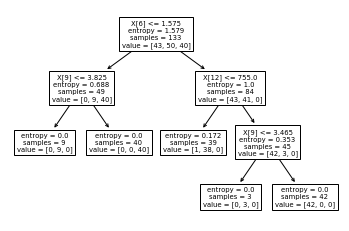

In [60]:
tree.plot_tree(clf)

```
ROOT
The root node contains 133 samples, icluding 43, 50, 40 points of label 0, 1, 2 respectively. The entropy is 1.579. 

LEFT BRANCH
The split threshold for attribute falnavoids (column index 6) is 1.575. If value for falnavoids is no greater than 1.575, then the tree classifies a data point to the left node below the root. This node has lower entropy (0.688) means we gain some information. The node contains mostly (40) data points with label 2 and 9 points with label 1. It's not a pure not, so further classification is possible. The threshold for attribute Color intensity (column index 9) is 3.825. Splitting further gives us 2 pure nodes (with 0 entropy), on the left is the node of 9 samples with label 1, on the right is the node of 40 samples of label 2.

RIGHT BRANCH
The same explanation for the right branch. We have thresholds for first split is 755 for attribute Proline, for second split is 3.465 for attribute Color intensity. Entropies lower after splitting. Two pure leaves have 0 entropy. However, there is one leaf node has entropy 0.172 because it contains 1 sample of label 0 and 38 samples of label 1. This happens because we set max_leaf_nodes=5. If we set it larger, then further splitting is possible, we will have all pure leaves. 
```

---